In [1]:
import pickle
import pycaret
import pandas as pd
import seaborn as sns
import preprocessing_functions
from sklearn import preprocessing
from pycaret.classification import *

Big-5 personality prediction

In [2]:
data = pd.read_pickle('data/fitbit_personality_to_model.pkl')
data

,id,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,calories,filteredDemographicVO2Max,distance,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,mindfulness_session,scl_avg,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi,Aerobic Workout,Bike,Bootcamp,Circuit Training,Elliptical,Hike,Interval Workout,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates,ipip_extraversion_category,ipip_agreeableness_category,ipip_conscientiousness_category,ipip_stability_category,ipip_intellect_category,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos
0,621e2e8e67b776a24055b564,34.137687,57.432,89.603,NaN,14.8,78.0,0.833333,0.675,0.866667,-1.788325,2351.59,62.79210,6517.5,71.701565,149.0,24.0,33.0,713.0,0.0,NaN,62.073070,31260000.0,0.0,445.0,76.0,0.0,93.0,1.243243,0.987013,0.921642,1.341772,8833.0,83.0,1349.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,LOW,LOW,HIGH,HIGH,AVERAGE,-0.866025,0.000000,0.309017,-0.988468,0.5,1.000000,0.951057,0.151428
1,621e2e8e67b776a24055b564,33.794544,57.681,94.303,NaN,15.8,80.0,0.833333,0.725,0.866667,-2.462709,2332.08,62.67912,7178.6,70.579300,132.0,25.0,31.0,704.0,0.0,NaN,62.121476,32880000.0,0.0,460.0,88.0,0.0,94.0,1.466667,1.142857,0.947566,1.197531,9727.0,56.0,1374.0,4.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,LOW,LOW,HIGH,HIGH,AVERAGE,-0.866025,0.781831,0.309017,-0.937752,0.5,0.623490,0.951057,0.347305
2,621e2e8e67b776a24055b564,34.611011,57.481,119.212,NaN,14.6,84.0,0.966667,0.725,0.866667,-2.385801,2262.30,62.57307,6090.9,71.842573,112.0,27.0,31.0,710.0,0.0,NaN,62.263999,33600000.0,0.0,493.0,67.0,0.0,96.0,1.116883,0.858974,1.015038,1.670732,8253.0,85.0,1350.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,LOW,LOW,HIGH,HIGH,AVERAGE,-0.866025,0.974928,0.309017,-0.848644,0.5,-0.222521,0.951057,0.528964
3,621e2e8e67b776a24055b564,34.408304,57.493,111.709,NaN,14.8,82.0,0.933333,0.725,0.833333,-2.124199,2325.10,62.47493,6653.1,71.725477,133.0,21.0,37.0,622.0,0.0,NaN,62.368900,37620000.0,0.0,540.0,87.0,0.0,93.0,1.128205,1.129870,1.191729,1.588235,9015.0,90.0,1282.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,LOW,LOW,HIGH,HIGH,AVERAGE,-0.866025,0.433884,0.309017,-0.724793,0.5,-0.900969,0.951057,0.688967
4,621e2e8e67b776a24055b564,34.178922,56.750,103.034,NaN,15.2,81.0,0.866667,0.725,0.866667,-2.396873,2586.76,62.41166,9557.9,74.401028,136.0,42.0,54.0,647.0,0.0,NaN,61.965409,33660000.0,0.0,493.0,68.0,0.0,94.0,0.910256,0.871795,1.211896,1.090909,12949.0,146.0,1274.0,4.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,LOW,LOW,HIGH,HIGH,AVERAGE,-0.866025,-0.433884,0.309017,-0.571268,0.5,-0.900969,0.951057,0.820763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3450,621e339967b776a240e502de,33.816660,51.760,47.281,96.7,11.6,79.0,0.700000,0.725,0.966667,-1.793898,1596.35,48.76235,5522.1,67.283493,122.0,4.0,32.0,800.0,0.0,NaN,56.371137,28920000.0,0.0,403.0,79.0,0.0,92.0,0.712644,1.067568,1.090196,0.684783,7231.0,41.0,1393.0,3.0,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AVERAGE,HIGH,AVERAGE,HIGH,AVERAGE,0.866025,0.433884,0.587785,0.485302,0.5,-0.900969,0.809017,-0.8743

predict extraversion

In [3]:
data = data.drop(columns=['ipip_agreeableness_category', 'ipip_conscientiousness_category', 'ipip_stability_category', 'ipip_intellect_category'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

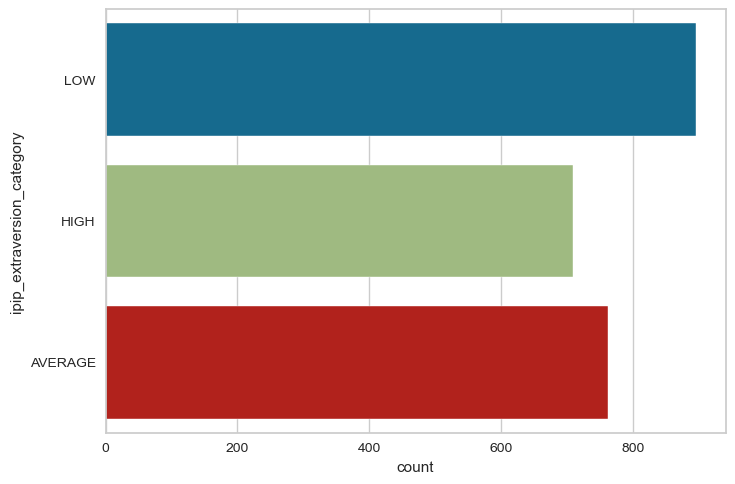

In [4]:
sns.countplot(y="ipip_extraversion_category", data=train_data)

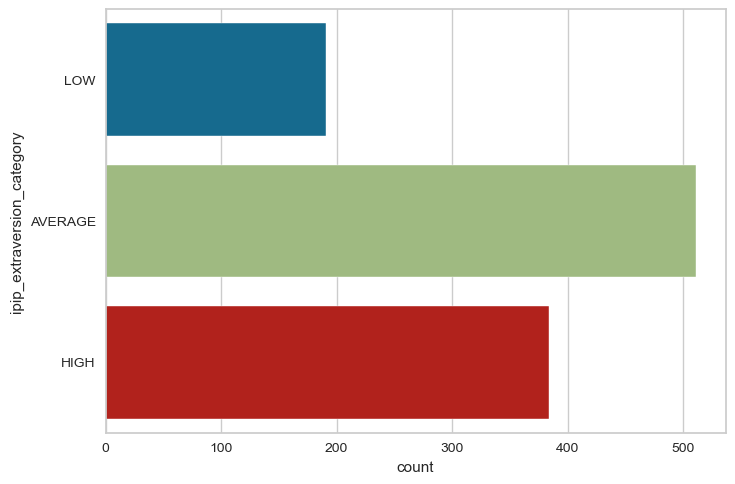

In [5]:
sns.countplot(y="ipip_extraversion_category", data=test_data)

In [6]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [7]:
s = setup(data=train_data, target='ipip_extraversion_category', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,ipip_extraversion_category
2,Target Type,Multiclass
3,Label Encoded,"AVERAGE: 0, HIGH: 1, LOW: 2"
4,Original Data,"(2369, 65)"
5,Missing Values,True
6,Numeric Features,38
7,Categorical Features,26
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
best = compare_models(errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.4044,0.0000,0.3333,0.1666,0.2351,0.0000,0.0000,0.1300
nb,Naive Bayes,0.3727,0.5057,0.3637,0.3805,0.3516,0.0598,0.0636,0.7567
rf,Random Forest Classifier,0.3458,0.4764,0.3499,0.3669,0.3390,0.0141,0.0164,0.2700
gbc,Gradient Boosting Classifier,0.3387,0.5019,0.3436,0.3353,0.3244,0.0067,0.0074,1.4100
knn,K Neighbors Classifier,0.3363,0.5463,0.3711,0.4221,0.3417,0.0444,0.0501,1.1033
ada,Ada Boost Classifier,0.3212,0.4850,0.3286,0.3620,0.3115,-0.0100,-0.0165,0.2267
qda,Quadratic Discriminant Analysis,0.3163,0.4545,0.2924,0.3059,0.3079,-0.0868,-0.0911,0.1467
lr,Logistic Regression,0.3130,0.4796,0.3436,0.2576,0.2492,0.0286,0.0495,1.6933
dt,Decision Tree Classifier,0.3093,0.4817,0.3227,0.3313,0.2987,-0.0368,-0.0349,0.0867
et,Extra Trees Classifier,0.3028,0.4310,0.3072,0.3422,0.3059,-0.0494,-0.0483,0.2367


In [9]:
best

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

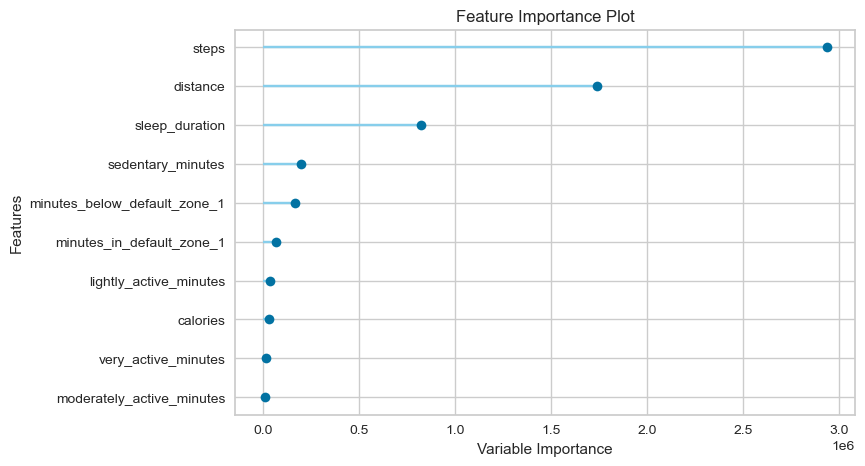

In [10]:
plot_model(best, plot='feature')

predict agreeableness

In [11]:
data = pd.read_pickle('data/fitbit_personality_to_model.pkl')

In [12]:
data = data.drop(columns=['ipip_extraversion_category', 'ipip_conscientiousness_category', 'ipip_stability_category', 'ipip_intellect_category'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

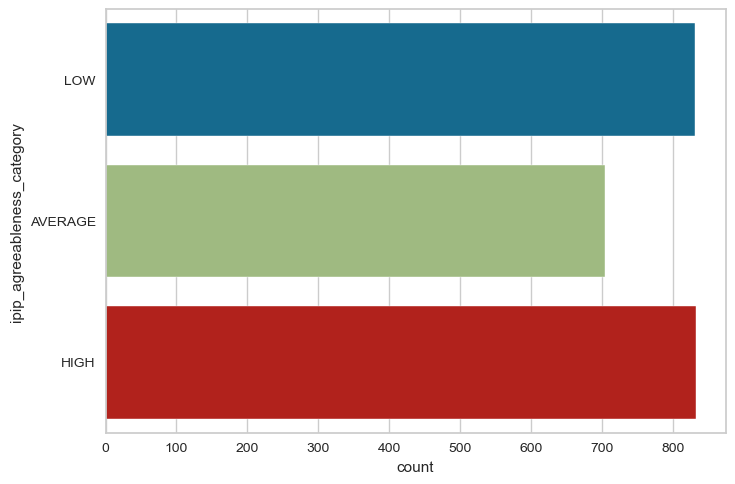

In [13]:
sns.countplot(y="ipip_agreeableness_category", data=train_data)

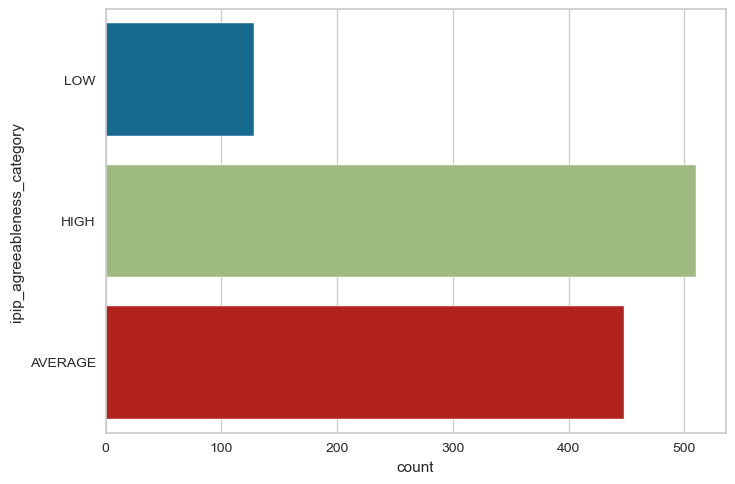

In [14]:
sns.countplot(y="ipip_agreeableness_category", data=test_data)

In [15]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [16]:
s = setup(data=train_data, target='ipip_agreeableness_category', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,ipip_agreeableness_category
2,Target Type,Multiclass
3,Label Encoded,"AVERAGE: 0, HIGH: 1, LOW: 2"
4,Original Data,"(2369, 65)"
5,Missing Values,True
6,Numeric Features,38
7,Categorical Features,26
8,Ordinal Features,False
9,High Cardinality Features,False


In [17]:
best = compare_models(errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.3127,0.4962,0.3162,0.3613,0.3143,-0.0169,-0.0152,0.1033
nb,Naive Bayes,0.3081,0.4976,0.3211,0.3481,0.2750,-0.0135,-0.0134,0.0500
qda,Quadratic Discriminant Analysis,0.3016,0.4565,0.3099,0.4242,0.2518,-0.0811,-0.0538,0.1200
svm,SVM - Linear Kernel,0.2729,0.0000,0.3333,0.0814,0.1241,0.0000,0.0000,0.1000
lr,Logistic Regression,0.2567,0.5013,0.3446,0.1588,0.1552,0.0167,0.0201,0.0767
dummy,Dummy Classifier,0.2451,0.5000,0.3333,0.0652,0.1019,0.0000,0.0000,0.0533
ada,Ada Boost Classifier,0.2389,0.3866,0.2271,0.2423,0.2364,-0.1811,-0.1855,0.1833
lda,Linear Discriminant Analysis,0.2234,0.3860,0.2120,0.2671,0.2254,-0.1840,-0.1910,0.0767
ridge,Ridge Classifier,0.2225,0.0000,0.2120,0.2729,0.2240,-0.1827,-0.1906,0.0633
dt,Decision Tree Classifier,0.2121,0.4080,0.2106,0.2490,0.2167,-0.1753,-0.1807,0.0567


In [18]:
# plot_model(best, plot='feature')

predict conscientiousness

In [19]:
data = pd.read_pickle('data/fitbit_personality_to_model.pkl')

In [20]:
data = data.drop(columns=['ipip_extraversion_category', 'ipip_agreeableness_category', 'ipip_stability_category', 'ipip_intellect_category'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

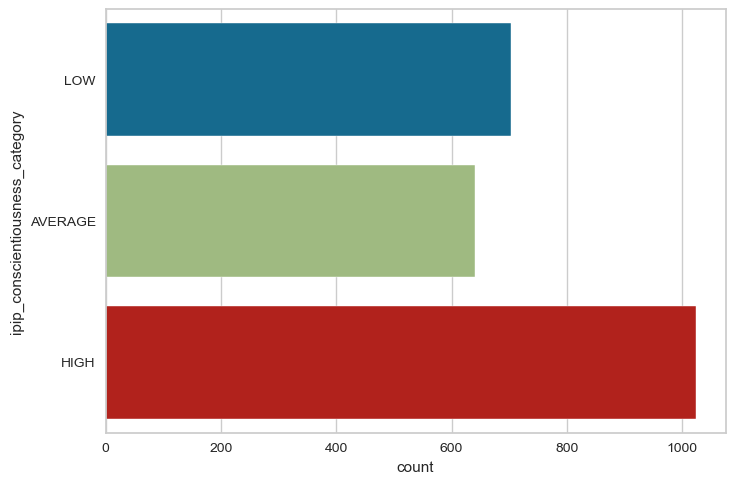

In [21]:
sns.countplot(y="ipip_conscientiousness_category", data=train_data)

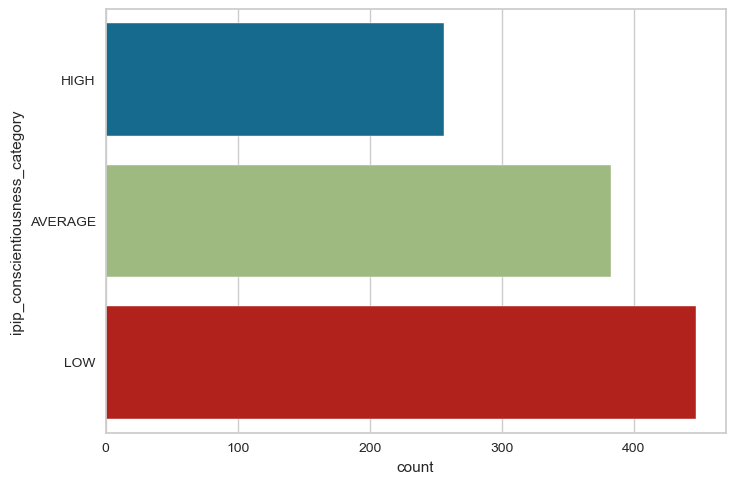

In [22]:
sns.countplot(y="ipip_conscientiousness_category", data=test_data)

In [23]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [24]:
s = setup(data=train_data, target='ipip_conscientiousness_category', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,ipip_conscientiousness_category
2,Target Type,Multiclass
3,Label Encoded,"AVERAGE: 0, HIGH: 1, LOW: 2"
4,Original Data,"(2369, 65)"
5,Missing Values,True
6,Numeric Features,38
7,Categorical Features,26
8,Ordinal Features,False
9,High Cardinality Features,False


In [25]:
best = compare_models(errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.4334,0.5000,0.3333,0.1902,0.2637,0.0000,0.0000,0.0600
lr,Logistic Regression,0.4197,0.5240,0.3255,0.2027,0.2658,-0.0140,-0.0250,0.0833
knn,K Neighbors Classifier,0.3879,0.5533,0.3854,0.4107,0.3800,0.0766,0.0803,0.0967
svm,SVM - Linear Kernel,0.3818,0.0000,0.3333,0.1582,0.2208,0.0000,0.0000,0.1000
qda,Quadratic Discriminant Analysis,0.3684,0.4840,0.3270,0.2701,0.3041,-0.0318,-0.0318,0.1200
ridge,Ridge Classifier,0.3627,0.0000,0.3308,0.3782,0.3444,0.0495,0.0534,0.0700
lda,Linear Discriminant Analysis,0.3508,0.5251,0.3204,0.3734,0.3368,0.0323,0.0340,0.0767
nb,Naive Bayes,0.3414,0.5495,0.3284,0.4107,0.3586,0.0539,0.0452,0.0533
et,Extra Trees Classifier,0.3243,0.4425,0.3020,0.2812,0.2918,-0.0213,-0.0237,0.1967
lightgbm,Light Gradient Boosting Machine,0.3209,0.4925,0.3012,0.2900,0.2929,-0.0357,-0.0323,0.5133


In [26]:
best

DummyClassifier(constant=None, random_state=123, strategy='prior')

In [27]:
# plot_model(best, plot='feature')

predict stability

In [28]:
data = pd.read_pickle('data/fitbit_personality_to_model.pkl')

In [29]:
data = data.drop(columns=['ipip_extraversion_category', 'ipip_agreeableness_category', 'ipip_conscientiousness_category', 'ipip_intellect_category'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

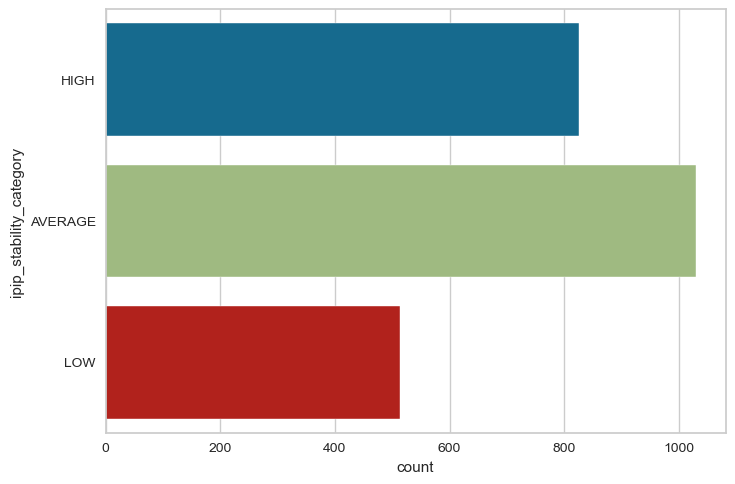

In [30]:
sns.countplot(y="ipip_stability_category", data=train_data)

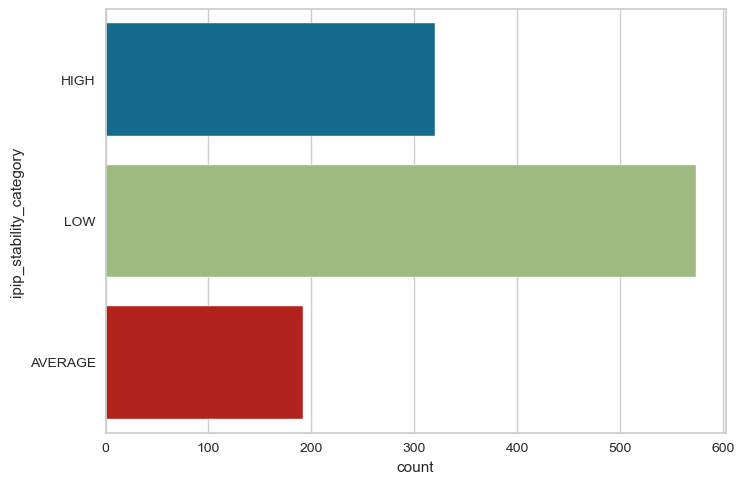

In [31]:
sns.countplot(y="ipip_stability_category", data=test_data)

In [32]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [33]:
s = setup(data=train_data, target='ipip_stability_category', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,ipip_stability_category
2,Target Type,Multiclass
3,Label Encoded,"AVERAGE: 0, HIGH: 1, LOW: 2"
4,Original Data,"(2369, 65)"
5,Missing Values,True
6,Numeric Features,38
7,Categorical Features,26
8,Ordinal Features,False
9,High Cardinality Features,False


In [34]:
best = compare_models(errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.4338,0.5000,0.3333,0.1935,0.2662,0.0000,0.0000,0.0533
lr,Logistic Regression,0.3680,0.4446,0.3211,0.2268,0.2719,-0.0324,-0.0378,0.0867
knn,K Neighbors Classifier,0.3634,0.4921,0.3262,0.3574,0.3231,-0.0103,-0.0035,0.1033
svm,SVM - Linear Kernel,0.3008,0.0000,0.3333,0.1117,0.1574,0.0000,0.0000,0.1200
qda,Quadratic Discriminant Analysis,0.2841,0.4130,0.2382,0.2540,0.2574,-0.1655,-0.1792,0.1200
nb,Naive Bayes,0.2242,0.3990,0.2238,0.2685,0.2107,-0.1692,-0.1882,0.0533
ada,Ada Boost Classifier,0.2176,0.3883,0.2286,0.2372,0.2029,-0.1358,-0.1575,0.2000
ridge,Ridge Classifier,0.1967,0.0000,0.2132,0.2184,0.1831,-0.1793,-0.1974,0.0667
lda,Linear Discriminant Analysis,0.1889,0.3539,0.2006,0.2140,0.1778,-0.1962,-0.2141,0.0733
dt,Decision Tree Classifier,0.1868,0.3900,0.1906,0.2147,0.1836,-0.2014,-0.2232,0.0600


In [35]:
best

DummyClassifier(constant=None, random_state=123, strategy='prior')

In [36]:
# plot_model(best, plot='feature')

predict intellect

In [37]:
data = pd.read_pickle('data/fitbit_personality_to_model.pkl')

In [38]:
data = data.drop(columns=['ipip_extraversion_category', 'ipip_agreeableness_category', 'ipip_conscientiousness_category', 'ipip_stability_category'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

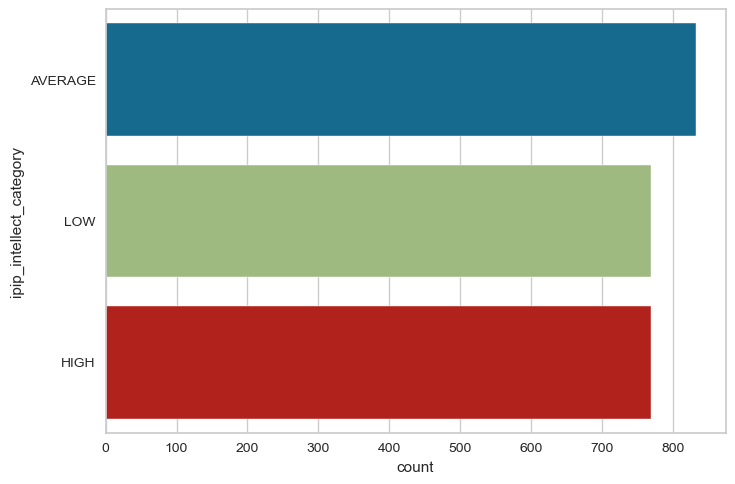

In [39]:
sns.countplot(y="ipip_intellect_category", data=train_data)

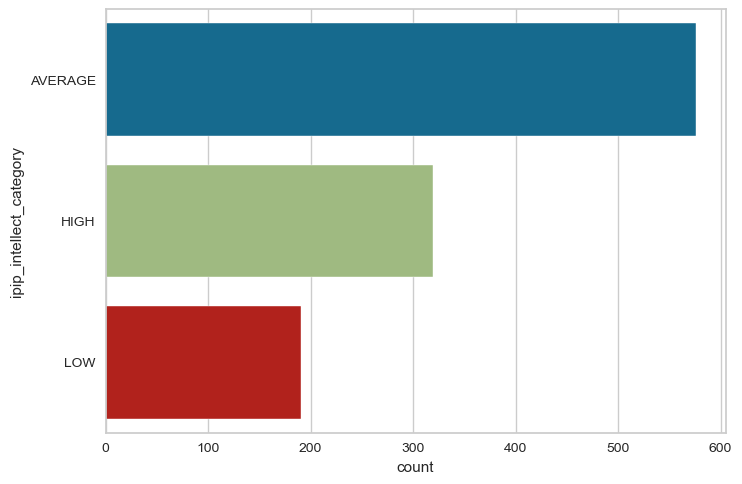

In [40]:
sns.countplot(y="ipip_intellect_category", data=test_data)

In [41]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [42]:
s = setup(data=train_data, target='ipip_intellect_category', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,ipip_intellect_category
2,Target Type,Multiclass
3,Label Encoded,"AVERAGE: 0, HIGH: 1, LOW: 2"
4,Original Data,"(2369, 65)"
5,Missing Values,True
6,Numeric Features,38
7,Categorical Features,26
8,Ordinal Features,False
9,High Cardinality Features,False


In [43]:
best = compare_models(errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.3373,0.4981,0.3305,0.3763,0.3309,0.0046,0.0057,0.1167
dt,Decision Tree Classifier,0.3277,0.5039,0.3326,0.3538,0.3247,0.0086,0.0066,0.0633
svm,SVM - Linear Kernel,0.3197,0.0000,0.3254,0.1320,0.1691,-0.0090,-0.0230,0.1167
gbc,Gradient Boosting Classifier,0.3190,0.4897,0.3195,0.3620,0.3111,0.0027,-0.0003,1.4200
nb,Naive Bayes,0.3178,0.5210,0.3200,0.3273,0.3040,-0.0063,-0.0055,0.0500
qda,Quadratic Discriminant Analysis,0.2941,0.4456,0.2706,0.2538,0.2606,-0.1045,-0.1297,0.1233
lightgbm,Light Gradient Boosting Machine,0.2902,0.4649,0.2980,0.3708,0.2964,-0.0383,-0.0386,0.5067
rf,Random Forest Classifier,0.2774,0.4411,0.2743,0.3274,0.2839,-0.0667,-0.0714,0.2367
ada,Ada Boost Classifier,0.2731,0.4790,0.2984,0.3404,0.2637,-0.0526,-0.0625,0.2033
lda,Linear Discriminant Analysis,0.2706,0.4287,0.2602,0.3087,0.2783,-0.0967,-0.0991,0.0767


In [44]:
best

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [45]:
# plot_model(best, plot='feature')

Stai stress category prediction

In [46]:
data = pd.read_pickle('data/fitbit_stai_to_model.pkl')
data

,id,stai_stress,stai_stress_category,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,...,Workout,Yoga/Pilates,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos
0,621e2e8e67b776a24055b564,45.0,Below average,34.408304,57.481,94.303,NaN,14.8,81.0,0.866667,...,0.0,0.0,-7.071068e-01,0.000000,-1.133108e-15,0.207912,-7.071068e-01,1.000000,1.000000,0.978148
1,621e2e8e67b776a24055b564,46.0,Average,34.476865,56.57,109.509,NaN,14.4,83.0,0.833333,...,0.0,0.0,-1.000000e+00,0.000000,2.817326e-01,0.994522,-1.836970e-16,1.000000,0.959493,0.104528
2,621e2e8e67b776a24055b564,46.0,Average,34.254286,57.33,100.374,NaN,15.0,75.0,0.833333,...,0.0,0.0,-7.071068e-01,0.000000,9.096320e-01,-0.743145,7.071068e-01,1.000000,-0.415415,-0.669131
3,621e2e8e67b776a24055b564,46.0,Average,34.515655,59.798,98.515,NaN,15.4,74.0,0.766667,...,0.0,0.0,-7.071068e-01,0.000000,7.557496e-01,-0.743145,7.071068e-01,1.000000,-0.654861,0.669131
4,621e2e8e67b776a24055b564,54.0,Above average,34.418045,53.006,107.388,NaN,15.6,76.0,0.766667,...,0.0,0.0,-1.000000e+00,0.000000,9.096320e-01,-0.406737,-1.836970e-16,1.000000,0.415415,0.913545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,621e339967b776a240e502de,49.0,Average,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7.071068e-01,0.000000,7.557496e-01,-0.994522,-7.071068e-01,1.000000,0.654861,-0.104528
275,621e339967b776a240e502de,51.0,Above average,34.674633,51.192,49.232,96.2,12.2,83.0,0.733333,...,0.0,0.0,3.673940e-16,0.000000,9.898214e-01,0.951057,-1.000000e+00,1.000000,0.142315,0.309017
276,621e339967b776a240e502de,45.0,Below average,34.303759,46.311,56.468,96.5,11.0,87.0,0.833333,...,0.0,0.0,3.673940e-16,0.781831,9.898214e-01,0.207912,-1.000000e+00,0.623490,-0.142315,-0.978148
277,621e339967b776a240e502de,48.0,Average,34.876472,50.683,47.293,96.0,11.6,82.0,0.766667,...,0.0,0.0,3.673940e-16,0.000000,9.096320e-01,-0.866025,-1.000000e+00,1.000000,-0.415415,-0.500000


In [47]:
cols = list(data.columns)
removed_ele = ['id', 'stai_stress_category']
for ele in removed_ele:
    cols.remove(ele)
for column in cols:
    data[column] = pd.to_numeric(data[column])

In [48]:
data = data.drop(columns=['stai_stress'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

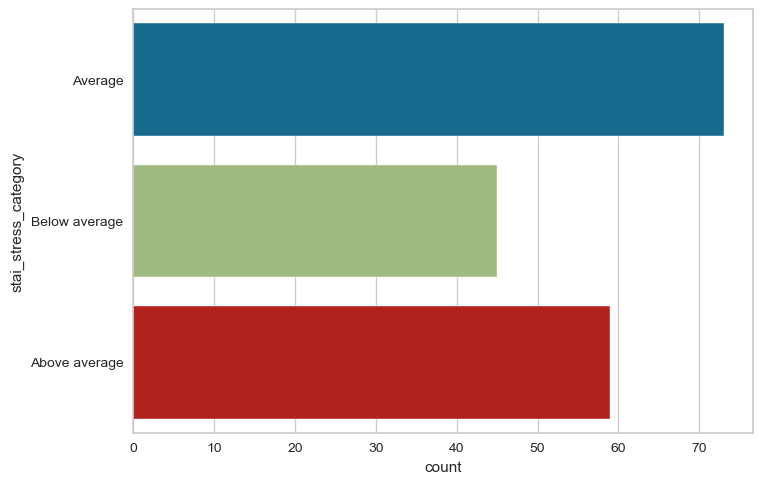

In [49]:
sns.countplot(y="stai_stress_category", data=train_data)

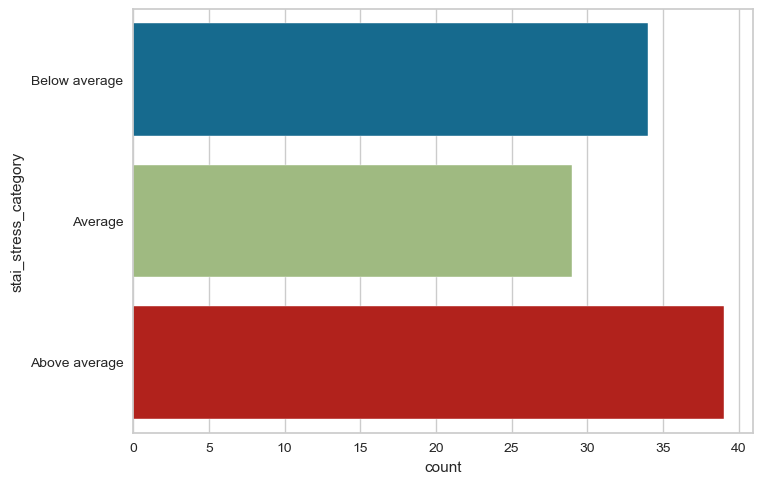

In [50]:
sns.countplot(y="stai_stress_category", data=test_data)

In [51]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [52]:
s = setup(data=train_data, target='stai_stress_category', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,stai_stress_category
2,Target Type,Multiclass
3,Label Encoded,"Above average: 0, Average: 1, Below average: 2"
4,Original Data,"(177, 65)"
5,Missing Values,True
6,Numeric Features,39
7,Categorical Features,25
8,Ordinal Features,False
9,High Cardinality Features,False


In [53]:
best = compare_models(errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.4407,0.5646,0.3967,0.4195,0.4027,0.1251,0.1350,0.0133
lr,Logistic Regression,0.4294,0.4771,0.3911,0.3335,0.3316,0.0881,0.1112,0.0200
nb,Naive Bayes,0.4068,0.5118,0.3574,0.3616,0.3736,0.0607,0.0668,0.0100
ada,Ada Boost Classifier,0.4068,0.4946,0.3560,0.3983,0.3731,0.0408,0.0461,0.0667
ridge,Ridge Classifier,0.3729,0.0000,0.3481,0.3983,0.3741,0.0449,0.0460,0.0067
gbc,Gradient Boosting Classifier,0.3729,0.5147,0.3498,0.3935,0.3565,0.0507,0.0597,0.2100
rf,Random Forest Classifier,0.3616,0.5131,0.3358,0.4389,0.3423,0.0310,0.0593,0.1267
dt,Decision Tree Classifier,0.3559,0.5143,0.3247,0.3830,0.3582,0.0153,0.0169,0.0133
et,Extra Trees Classifier,0.3559,0.4929,0.3234,0.3755,0.3375,0.0122,0.0130,0.1400
lightgbm,Light Gradient Boosting Machine,0.3559,0.4954,0.3344,0.3823,0.3487,0.0206,0.0244,0.0433


In [54]:
best

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [55]:
# plot_model(best, plot='feature')

Panas prediction

In [56]:
data = pd.read_pickle('data/fitbit_panas_to_model.pkl')
data

,id,negative_affect_category,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,...,Workout,Yoga/Pilates,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos
0,621e2e8e67b776a24055b564,Below average,34.515655,59.798,98.515,NaN,15.4,74.0,0.766667,0.725,...,0.0,0.0,-7.071068e-01,0.000000,7.557496e-01,-0.743145,7.071068e-01,1.000000,-0.654861,0.669131
1,621e2e8e67b776a24055b564,Below average,34.408304,57.481,94.303,NaN,14.8,81.0,0.866667,0.725,...,0.0,0.0,-7.071068e-01,0.000000,-1.133108e-15,0.207912,-7.071068e-01,1.000000,1.000000,0.978148
2,621e2e8e67b776a24055b564,Below average,34.476865,56.57,109.509,NaN,14.4,83.0,0.833333,0.775,...,0.0,0.0,-1.000000e+00,0.000000,2.817326e-01,0.994522,-1.836970e-16,1.000000,0.959493,0.104528
3,621e2e8e67b776a24055b564,Below average,34.418045,53.006,107.388,NaN,15.6,76.0,0.766667,0.7,...,0.0,0.0,-1.000000e+00,0.000000,9.096320e-01,-0.406737,-1.836970e-16,1.000000,0.415415,0.913545
4,621e2e8e67b776a24055b564,Below average,34.254286,57.33,100.374,NaN,15.0,75.0,0.833333,0.7,...,0.0,0.0,-7.071068e-01,0.000000,9.096320e-01,-0.743145,7.071068e-01,1.000000,-0.415415,-0.669131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,621e339967b776a240e502de,Below average,34.876472,50.683,47.293,96.0,11.6,82.0,0.766667,0.875,...,0.0,0.0,3.673940e-16,0.000000,9.096320e-01,-0.866025,-1.000000e+00,1.000000,-0.415415,-0.500000
264,621e339967b776a240e502de,Below average,35.107574,54.325,47.929,95.4,12.2,87.0,0.866667,0.95,...,0.0,0.0,3.673940e-16,0.000000,7.557496e-01,-0.587785,-1.000000e+00,1.000000,-0.654861,0.809017
265,621e339967b776a240e502de,Below average,34.957428,52.81,47.801,94.9,12.4,81.0,0.7,0.9,...,0.0,0.0,7.071068e-01,0.000000,2.817326e-01,0.587785,7.071068e-01,1.000000,0.959493,0.809017
266,621e339967b776a240e502de,Below average,34.073346,51.364,51.324,96.1,12.2,84.0,0.833333,0.875,...,0.0,0.0,7.071068e-01,0.974928,5.406408e-01,0.587785,7.071068e-01,-0.222521,0.841254,-0.809017


In [57]:
cols = list(data.columns)
removed_ele = ['id', 'negative_affect_category']
for ele in removed_ele:
    cols.remove(ele)
for column in cols:
    data[column] = pd.to_numeric(data[column])

In [58]:
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

In [59]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [60]:
s = setup(data=train_data, target='negative_affect_category', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,negative_affect_category
2,Target Type,Multiclass
3,Label Encoded,"Above average: 0, Average: 1, Below average: 2"
4,Original Data,"(166, 65)"
5,Missing Values,True
6,Numeric Features,39
7,Categorical Features,25
8,Ordinal Features,False
9,High Cardinality Features,False


In [61]:
best = compare_models(errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.4161,0.0000,0.3333,0.1796,0.2490,0.0000,0.0000,0.0100
knn,K Neighbors Classifier,0.3313,0.5150,0.3418,0.4047,0.3388,0.0274,0.0254,0.0133
lda,Linear Discriminant Analysis,0.3077,0.5235,0.3205,0.3379,0.3070,-0.0207,-0.0258,0.0200
dummy,Dummy Classifier,0.2955,0.5000,0.3333,0.0928,0.1396,0.0000,0.0000,0.0133
et,Extra Trees Classifier,0.2953,0.4432,0.3348,0.3217,0.2742,-0.0164,-0.0213,0.1367
dt,Decision Tree Classifier,0.2829,0.4616,0.2882,0.3162,0.2865,-0.0700,-0.0723,0.0133
ada,Ada Boost Classifier,0.2777,0.4413,0.2822,0.3282,0.2868,-0.0682,-0.0707,0.0767
ridge,Ridge Classifier,0.2776,0.0000,0.3030,0.3107,0.2729,-0.0506,-0.0564,0.0067
lr,Logistic Regression,0.2712,0.5229,0.3173,0.0988,0.1363,-0.0283,-0.0458,0.0200
qda,Quadratic Discriminant Analysis,0.2655,0.4534,0.2715,0.2149,0.2177,-0.0885,-0.1430,0.0200


In [62]:
best

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

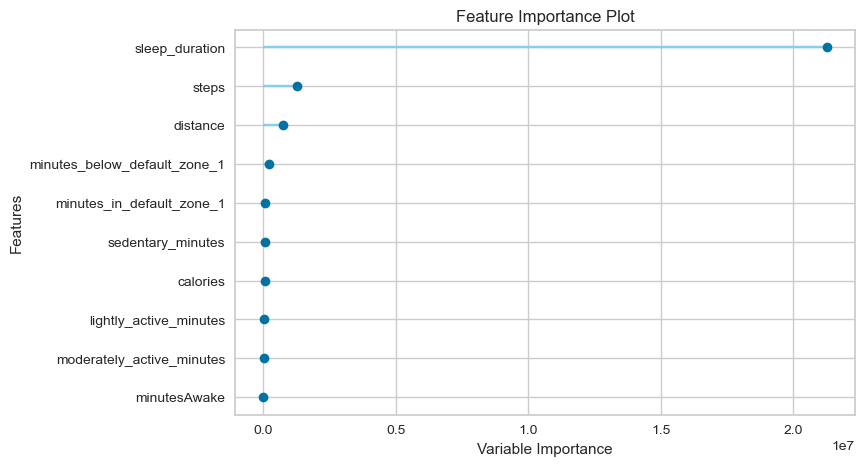

In [63]:
plot_model(best, plot='feature')